In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [14]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [15]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [16]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [17]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [18]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

male mv
meulaboh id
batagay-alyta ru
barrow us
abu dhabi ae
vardo no
beringovskiy ru
new norfolk au
ushuaia ar
kenora ca
fenoarivo mg
dori bf
thompson ca
saint-philippe re
lompoc us
norman wells ca
berlevag no
san antonio cl
astoria us
cabo san lucas mx
adrar dz
port keats au
mataura pf
sao miguel do araguaia br
plettenberg bay za
mataura pf
deputatskiy ru
la ronge ca
rikitea pf
nisia floresta br
egvekinot ru
rikitea pf
taolanaro mg
kholodnyy ru
punta arenas cl
pacific grove us
moranbah au
bluff nz
grand-santi gf
port alfred za
ribeira grande pt
avarua ck
ushuaia ar
matamoros mx
puerto ayora ec
georgetown sh
najran sa
manzil salim tn
puerto ayora ec
vaitupu wf
jamestown sh
talnakh ru
provideniya ru
kapaa us
ordynskoye ru
mehamn no
nikolskoye ru
albany au
bredasdorp za
erenhot cn
maragogi br
castro cl
mar del plata ar
tura ru
mezen ru
coro ve
alcudia es
ushuaia ar
klaksvik fo
portland au
kodiak us
bage br
saint-philippe re
touros br
bluff nz
nome us
tual id
busselton au
yellowknife ca
d

kaitangata nz
mataura pf
balsas br
tilichiki ru
busselton au
tuktoyaktuk ca
springbok za
gondar et
qingdao cn
pihuamo mx
busselton au
iqaluit ca
amderma ru
grand centre ca
kapaa us
barentsburg sj
mahebourg mu
lebu cl
karachi pk
panzhihua cn
robat karim ir
dikson ru
taolanaro mg
jiayuguan cn
kapaa us
geraldton au
rikitea pf
hambantota lk
ashqelon il
avarua ck
dikson ru
kapaa us
bluff nz
ushuaia ar
khasan ru
esperance au
mataura pf
new norfolk au
quatre cocos mu
torbay ca
marcona pe
maghama mr
wanning cn
barrow us
ancud cl
kavaratti in
taolanaro mg
punta arenas cl
verkhnevilyuysk ru
brooks ca
arraial do cabo br
barentsburg sj
arraial do cabo br
salalah om
abhayapuri in
hobart au
ushuaia ar
banda aceh id
sentyabrskiy ru
hilo us
victoria sc
panama city us
bethel us
tecoanapa mx
avarua ck
saint-philippe re
isangel vu
cukai my
punta arenas cl
hobart au
hermanus za
taolanaro mg
bredasdorp za
souillac mu
jamestown sh
vaini to
cauquenes cl
zeya ru
aden ye
cherskiy ru
hasaki jp
asau tv
butaritar

arraial do cabo br
havre-saint-pierre ca
kemijarvi fi
ancud cl
georgetown sh
lebu cl
jamestown sh


In [19]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

634

In [20]:
import requests
from config import weather_api_key

In [21]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb3c5fccb85679aa1e9bb430e51074fe


In [22]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb3c5fccb85679aa1e9bb430e51074fe&q=Boston


In [23]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
       # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    
  

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | male
Processing Record 2 of Set 1 | meulaboh
Processing Record 3 of Set 1 | batagay-alyta
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | abu dhabi
Processing Record 6 of Set 1 | vardo
Processing Record 7 of Set 1 | beringovskiy
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | kenora
Processing Record 11 of Set 1 | fenoarivo
Processing Record 12 of Set 1 | dori
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | norman wells
Processing Record 17 of Set 1 | berlevag
Processing Record 18 of Set 1 | san antonio
Processing Record 19 of Set 1 | astoria
Processing Record 20 of Set 1 | cabo san lucas
Processing Record 21 of Set 1 | adrar
Processing Record 22 of Set 1 | port keats
Processing Record 23 of Set 1 | ma

Processing Record 43 of Set 4 | russell
Processing Record 44 of Set 4 | buala
Processing Record 45 of Set 4 | churhat
Processing Record 46 of Set 4 | salinopolis
Processing Record 47 of Set 4 | rovaniemi
Processing Record 48 of Set 4 | hithadhoo
Processing Record 49 of Set 4 | cap malheureux
Processing Record 50 of Set 4 | benguela
Processing Record 1 of Set 5 | ancud
Processing Record 2 of Set 5 | mufulira
Processing Record 3 of Set 5 | tazovskiy
Processing Record 4 of Set 5 | kavaratti
Processing Record 5 of Set 5 | karpathos
Processing Record 6 of Set 5 | simbahan
Processing Record 7 of Set 5 | kigoma
Processing Record 8 of Set 5 | alofi
Processing Record 9 of Set 5 | kununurra
Processing Record 10 of Set 5 | warqla
City not found. Skipping...
Processing Record 11 of Set 5 | sayat
Processing Record 12 of Set 5 | catamarca
Processing Record 13 of Set 5 | baoning
Processing Record 14 of Set 5 | kegayli
City not found. Skipping...
Processing Record 15 of Set 5 | tumannyy
City not found

Processing Record 32 of Set 8 | karachi
Processing Record 33 of Set 8 | panzhihua
Processing Record 34 of Set 8 | robat karim
Processing Record 35 of Set 8 | jiayuguan
Processing Record 36 of Set 8 | ashqelon
Processing Record 37 of Set 8 | khasan
Processing Record 38 of Set 8 | quatre cocos
Processing Record 39 of Set 8 | maghama
City not found. Skipping...
Processing Record 40 of Set 8 | wanning
Processing Record 41 of Set 8 | verkhnevilyuysk
Processing Record 42 of Set 8 | brooks
Processing Record 43 of Set 8 | salalah
Processing Record 44 of Set 8 | abhayapuri
Processing Record 45 of Set 8 | banda aceh
Processing Record 46 of Set 8 | panama city
Processing Record 47 of Set 8 | bethel
Processing Record 48 of Set 8 | tecoanapa
Processing Record 49 of Set 8 | cukai
Processing Record 50 of Set 8 | cauquenes
Processing Record 1 of Set 9 | zeya
Processing Record 2 of Set 9 | aden
Processing Record 3 of Set 9 | asau
Processing Record 4 of Set 9 | sechura
Processing Record 5 of Set 9 | sal

City not found. Skipping...
Processing Record 21 of Set 12 | waihi beach
Processing Record 22 of Set 12 | akdepe
Processing Record 23 of Set 12 | takaungu
Processing Record 24 of Set 12 | itororo
Processing Record 25 of Set 12 | tono
Processing Record 26 of Set 12 | tupaciguara
Processing Record 27 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 28 of Set 12 | windhoek
Processing Record 29 of Set 12 | inuvik
Processing Record 30 of Set 12 | ucluelet
Processing Record 31 of Set 12 | szamotuly
Processing Record 32 of Set 12 | praxedis guerrero
Processing Record 33 of Set 12 | chagda
City not found. Skipping...
Processing Record 34 of Set 12 | santa marta
Processing Record 35 of Set 12 | altar
Processing Record 36 of Set 12 | san carlos de bariloche
Processing Record 37 of Set 12 | idrinskoye
Processing Record 38 of Set 12 | sal rei
Processing Record 39 of Set 12 | salinas
Processing Record 40 of Set 12 | mayo
Processing Record 41 of Set 12 | umzimvubu
City not found. S

In [25]:
len(city_data)

588

In [26]:
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Male,MV,2022-04-27 18:35:15,4.1748,73.5089,84.07,71,100,3.89
1,Meulaboh,ID,2022-04-27 18:35:15,4.1363,96.1285,77.99,89,65,2.55
2,Batagay-Alyta,RU,2022-04-27 18:35:16,67.8006,130.4114,2.77,95,100,4.59
3,Barrow,US,2022-04-27 18:31:03,71.2906,-156.7887,5.02,85,100,14.97
4,Abu Dhabi,AE,2022-04-27 18:33:11,24.4667,54.3667,84.31,63,0,5.75
5,Vardo,NO,2022-04-27 18:35:17,70.3705,31.1107,22.98,93,0,27.63
6,Beringovskiy,RU,2022-04-27 18:35:18,63.0500,179.3167,31.66,99,100,4.94
7,New Norfolk,AU,2022-04-27 18:35:18,-42.7826,147.0587,56.91,88,100,0.83
8,Ushuaia,AR,2022-04-27 18:32:15,-54.8000,-68.3000,37.06,81,75,10.36
9,Kenora,CA,2022-04-27 18:35:19,49.8167,-94.4337,38.37,32,0,5.75


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

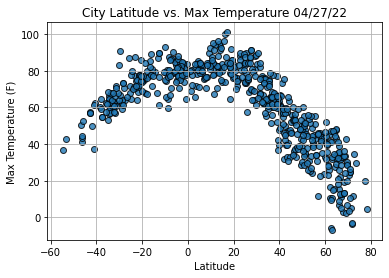

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

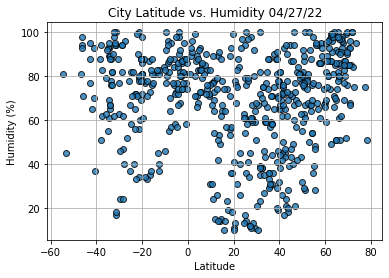

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

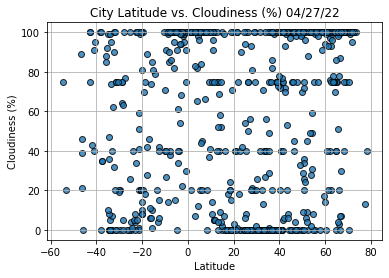

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

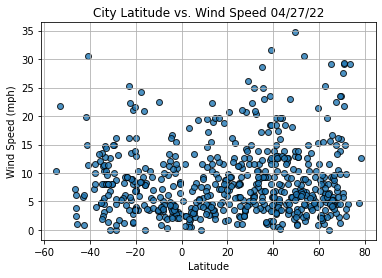

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [59]:

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
        regress_values = x_values * slope + intercept
    # Get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.title(title)
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.show()

In [34]:
index13 = city_data_df.loc[13]
index13

City               Saint-Philippe
Country                        RE
Date          2022-04-27 18:35:20
Lat                      -21.3585
Lng                       55.7679
Max Temp                    72.99
Humidity                       79
Cloudiness                     51
Wind Speed                   2.84
Name: 13, dtype: object

In [35]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
583     True
584    False
585    False
586     True
587     True
Name: Lat, Length: 588, dtype: bool

In [36]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Male,MV,2022-04-27 18:35:15,4.1748,73.5089,84.07,71,100,3.89
1,Meulaboh,ID,2022-04-27 18:35:15,4.1363,96.1285,77.99,89,65,2.55
2,Batagay-Alyta,RU,2022-04-27 18:35:16,67.8006,130.4114,2.77,95,100,4.59
3,Barrow,US,2022-04-27 18:31:03,71.2906,-156.7887,5.02,85,100,14.97
4,Abu Dhabi,AE,2022-04-27 18:33:11,24.4667,54.3667,84.31,63,0,5.75


In [41]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

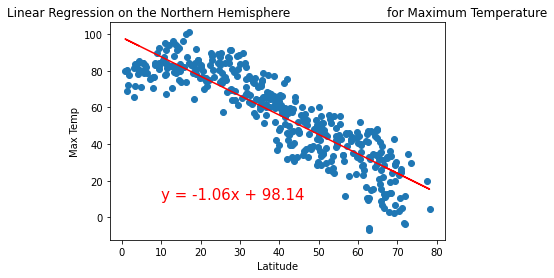

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,10))



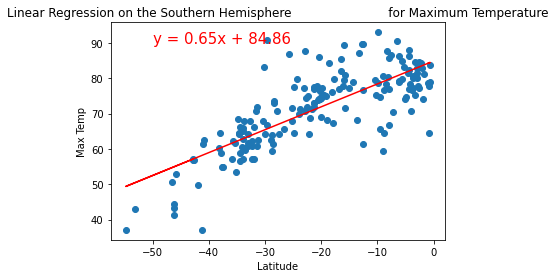

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

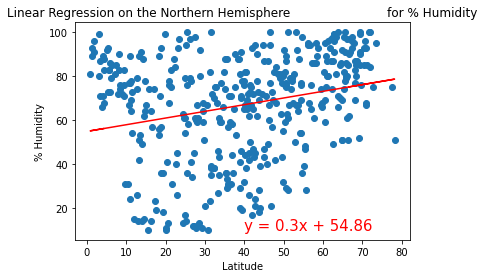

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

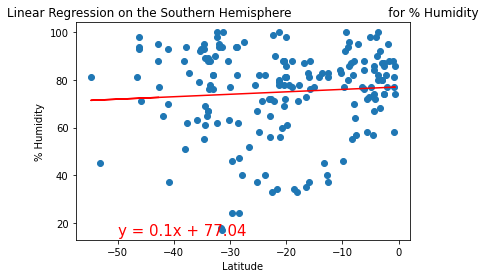

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

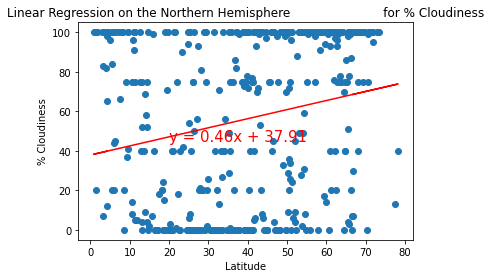

In [91]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness', (20,45))

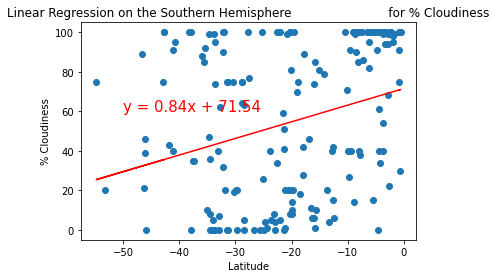

In [92]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

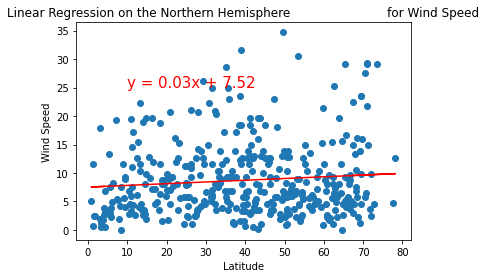

In [99]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,25))

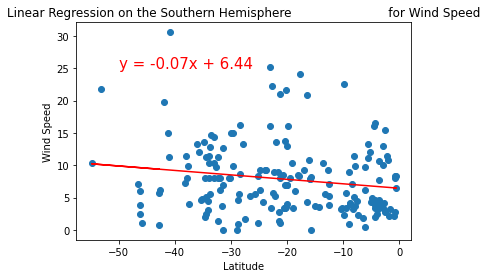

In [124]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))